# Quality experiments

Feature extraction to detect broken respiratory belt

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

### Load data

In [2]:
df_lab = pd.read_csv('../data/raw/labels.csv')
df = pd.read_csv('../data/raw/time_series.csv')
classes = np.unique(df_lab.label)

In [3]:
is_ok = [x in ['respiratory_chest'] for x in df_lab.label] 
df_ok = df[df.columns[is_ok]]

is_nok = [x in ['respiratory_chest_broken'] for x in df_lab.label] 
df_nok = df[df.columns[is_nok]]

### Visualize a few signals

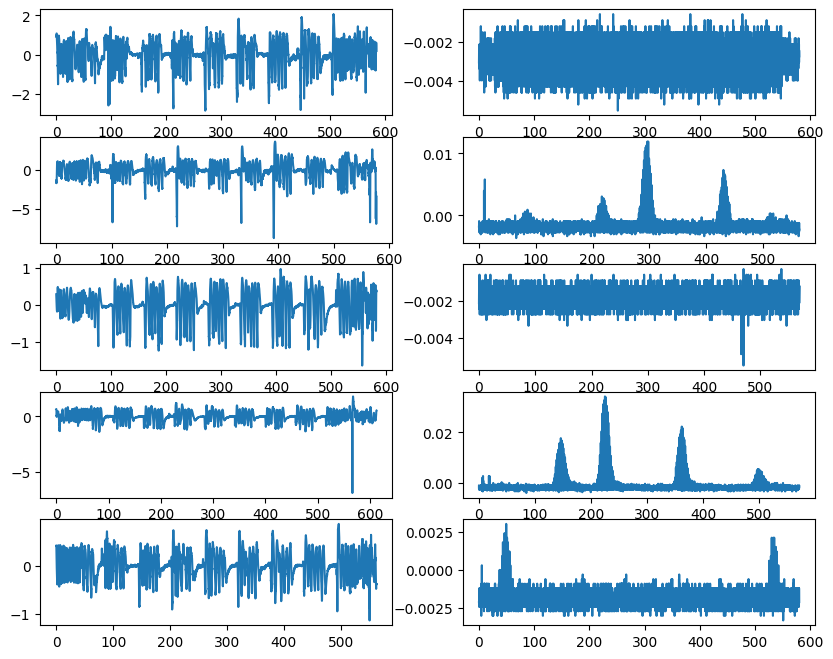

In [4]:
n_point = df.shape[0]
Ts = 1/20
t = np.arange(0, n_point * Ts, Ts)

n_signal = 5

fig, ax = plt.subplots(n_signal,2, figsize=(10,8))
for i in range(n_signal):
    ax[i, 0].plot(t, df_ok.iloc[:,i])
    ax[i, 1].plot(t, df_nok.iloc[:,i])

### Compute features

In [5]:
def smoothness(s, Ts):
    s = s - np.nanmean(s)
    
    ds = (s[1:] - s[:-1]) / Ts
    ds2 = (ds[1:] - ds[:-1]) / Ts
    
    return np.nanmean(np.abs(ds2))

def entropy(s, bins=40):
    s = s[s==s]
    pk, _ = np.histogram(s, bins=40)
    pk = pk / np.sum(pk)
    return stats.entropy(pk, base=2)

In [6]:
df_feat_ok = pd.DataFrame({'std':        df_ok.apply(lambda x: np.nanstd(x)),
                           'smoothness':  df_ok.apply(lambda x: smoothness(x.values, 1/20)),
                           'entropy':    df_ok.apply(lambda x: entropy(x))})

df_feat_nok = pd.DataFrame({'std':        df_nok.apply(lambda x: np.nanstd(x)),
                            'smoothness': df_nok.apply(lambda x: smoothness(x.values, 1/20)),
                            'entropy':    df_nok.apply(lambda x: entropy(x))})

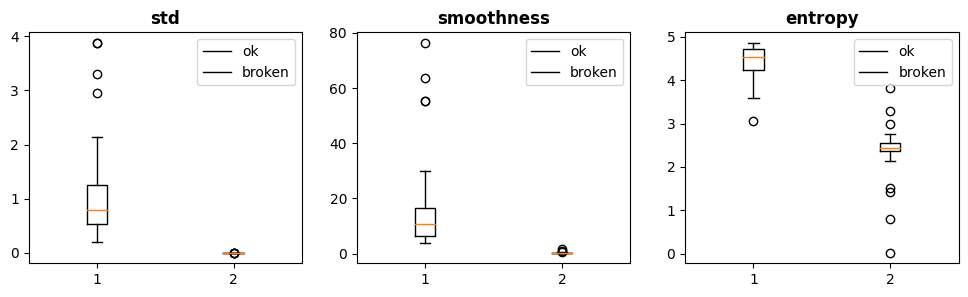

In [7]:
fig, ax = plt.subplots(1,3,figsize=(12,3))
for i_col, var in enumerate(df_feat_ok.columns):
    y_ok  = df_feat_ok[var].values
    y_nok = df_feat_nok[var].values
    
    ax[i_col].boxplot((y_ok, y_nok))
    """y = np.concatenate((y_ok, y_nok))
    bins = np.linspace(np.min(y), np.max(y), 200)
    
    ax[i_col].hist(y_ok, bins, alpha=0.5)
    ax[i_col].hist(y_nok, bins, alpha=0.5)
    """
    ax[i_col].set_title(df_feat_ok.columns[i_col], fontweight='bold', fontsize=12)
    ax[i_col].legend(['ok','broken'])

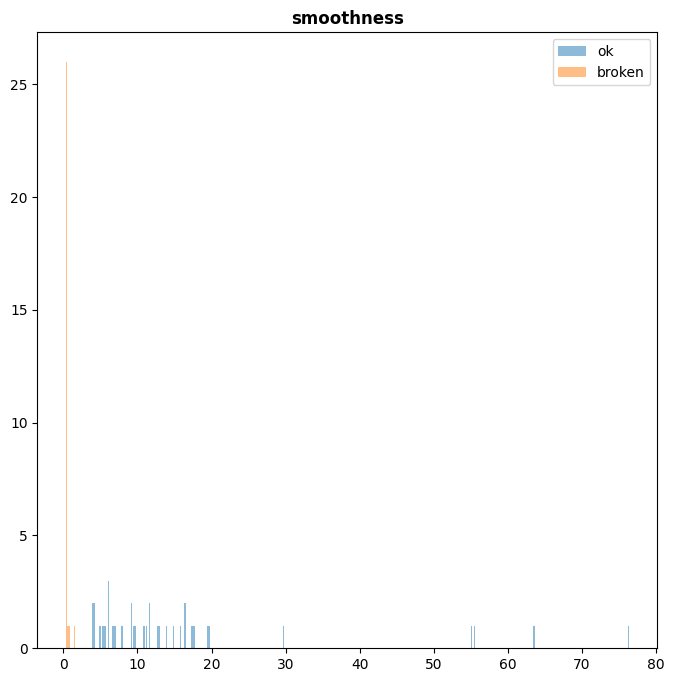

In [8]:
var = 'smoothness'
fig, ax = plt.subplots(figsize=(8,8))
y_ok  = df_feat_ok[var].values
y_nok = df_feat_nok[var].values
    
y = np.concatenate((y_ok, y_nok))
bins = np.linspace(np.min(y), np.max(y), 400)
    
ax.hist(y_ok, bins, alpha=0.5)
ax.hist(y_nok, bins, alpha=0.5)

ax.set_title(var, fontweight='bold', fontsize=12)
ax.legend(['ok','broken'])

In [9]:
np.max(y_nok)

1.565491244641291

In [10]:
np.min(y_ok)

3.912693331060956

In [11]:
import statsmodels.api as sm

acorr = sm.tsa.acf(data, nlags = len(lags)-1)

NameError: name 'data' is not defined